<!--HEADER-->
*[Notas de aula da disciplina de Modelagem Matemática](https://github.com/rmsrosa/modelagem_matematica) do [IM-UFRJ](https://www.im.ufrj.br).*

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/notebooks/01.04-Arquivos_dados_e_mais_graficos.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=notebooks/01.04-Arquivos_dados_e_mais_graficos.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;

[<- 1.3. Gráficos de funções](01.03-Graficos_de_funcoes.ipynb) | [Página Inicial](00.00-Pagina_inicial.ipynb) | [Bibliografia](BA.00-Bibliografia.ipynb) | [1.5. Computação simbólica ->](01.05-Computacao_simbolica.ipynb)

---


# Arquivos, dados e mais gráficos

Neste capítulo, vamos trabalhar com alguns dados sintéticos ("artificiais") e alguns dados reais obtidos de arquivos no formato [Comma-separated values (csv)](https://en.wikipedia.org/wiki/Comma-separated_values). 

Tanto `numpy` como `pandas` podem trabalhar com *arrays* com elementos de tipos diferentes (veja [Numpy Structured arrays](https://docs.scipy.org/doc/numpy/user/basics.rec.html) e [Pandas](https://pandas.pydata.org/index.html)). No entanto, a criação, busca e modificação de *arrays* complexos estruturados com diferentes tipos de dados é mais flexível em `pandas`, como veremos abaixo no caso de dados mundiais de tuberculose. Mas para *arrays* simples, é mais fácil trabalhar com `numpy`.

Vejamos alguns exemplos.

## Caminho para os arquivos

Antes de carregarmos os arquivos locais, precisamos definir o caminho certo para eles, pois isso varia caso eles estejam no *Google Drive* e estivermos usando o *Google Colab* ou caso estivermos usando *jupyter lab* ou *jupyter notebook*. 

O caminho certo pode ser encontrado da forma a seguir. Vale ressaltar que, caso esteja no *Google Colab*, na primeira vez que o código abaixo for executado, ele irá requisitar que seja aberta uma determinada página para habilitar o *Google Drive File Stream* a acessar a sua conta no Google e, assim, verificar se você tem permissão para acessar aquele diretório do Google Drive que contém as notas. Após a sua permissão, ele irá exibir uma senha que deverá ser preenchida no diálogo aberto logo após a execução da célula de código. Uma vez feito isso, a execução da célula será concluída e os outros blocos poderão ser executados.

In [1]:
try:
    # Executa esse bloco caso esteja no google colab e define a variável nbpath para esse caso
    from google.colab import drive
    drive.mount('/content/gdrive')
    nbpath="/content/gdrive/My Drive/Colab Notebooks/modmat/modmatnb"
except:
    # caso contrário, nbpath é uma string em branco
    nbpath=""

**Importante:** Caso você copie as notas para o seu *Google Drive* e execute os códigos pelo *Google Colab*, a célula acima irá assumir que as notas estão no subdiretório `My Drive/Colab Notebooks/modmat/modmatnb`. Caso use outro subdiretório, este endereço deverá ser devidamente atualizado. Caso use o *jupyter lab* ou o *jupyter notebook*, não é necessária nenhuma preocupação, apenas que mantenha a estrutura de subdiretórios do próprio `modmatnb`, independente de onde ele esteja na sua máquina e de como este mesmo diretório seja nomeado.

## Importando dados

Vamos usar o arquivo `water_properties_from_Batchelor.csv` como exemplo. Ele descreve os dados de densidade e viscosidade da água pura para certos valores da temperatura, sob pressão ambiente, ao nível do mar. Vamos importá-lo de três maneiras diferentes. Uma usando a biblioteca padrão `csv`, outra usando o `numpy` e a última, o `pandas'.

In [8]:
from os import path
import csv
import numpy as np
import pandas as pd

# Usa path.join para evitar probleams com as diferenças de como os sistemas denotam subdiretórios
arquivo = path.join('dados', 'destino_jupyter', 'water_properties_from_Batchelor.csv')

# Lê arquivo com o módulo csv
agua1 = list(csv.reader(open(arquivo, "r"), delimiter=","))

# Despreza as primeiras duas linhas que contém texto e converte os dados para numpy float
agua2 = np.array(agua1[2:]).astype("float")

# Lê direto como ndarray usando funções do numpy 
# Pula as duas primeiras linhas que contém texto para poder ler os números como float
agua3 = np.loadtxt(open(arquivo, "rb"), delimiter=",", skiprows=2)

# Lê usando pandas
agua4 = pd.read_csv(arquivo, header=[0,1])

print('Atributos da água pura como lista via módulo csv:\n', agua1)
print('\nAtributos da água pura como ndarray a partir da lista:\n', agua2)
print('\nAtributos da água pura como ndarray direto via numpy:\n', agua3)
print('\nAtributos da água pura via pandas:\n', agua4)

Atributos da água pura como lista via módulo csv:
 [['temp', ' density', ' viscosity'], ['Temperature (C)', ' Density (g/cm^3)', ' Viscosity (cm^2/s)'], ['0', '0.9999', '0.01787'], ['5', '1', '1.514'], ['10', '0.9997', '1.304'], ['15', '0.9991', '1.138'], ['20', '0.9982', '1.004'], ['25', '0.9971', '0.894'], ['30', '0.9957', '0.802'], ['35', '0.9941', '0.725'], ['40', '0.9923', '0.659'], ['50', '0.9881', '0.554'], ['60', '0.9832', '0.475'], ['70', '0.9778', '0.414'], ['80', '0.9718', '0.366'], ['90', '0.9653', '0.327'], ['100', '0.9584', '0.295']]

Atributos da água pura como ndarray a partir da lista:
 [[0.000e+00 9.999e-01 1.787e-02]
 [5.000e+00 1.000e+00 1.514e+00]
 [1.000e+01 9.997e-01 1.304e+00]
 [1.500e+01 9.991e-01 1.138e+00]
 [2.000e+01 9.982e-01 1.004e+00]
 [2.500e+01 9.971e-01 8.940e-01]
 [3.000e+01 9.957e-01 8.020e-01]
 [3.500e+01 9.941e-01 7.250e-01]
 [4.000e+01 9.923e-01 6.590e-01]
 [5.000e+01 9.881e-01 5.540e-01]
 [6.000e+01 9.832e-01 4.750e-01]
 [7.000e+01 9.778e-01 4.14

Visualizando os dados da densidade em função da temperatura.

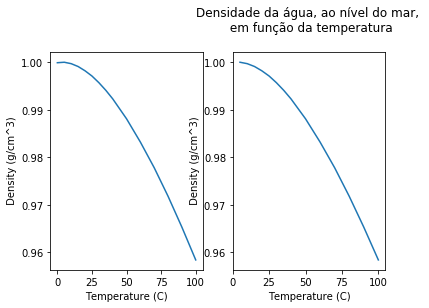

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Cria o objeto onde a figura será gerada
fig = plt.figure()

# Cria dois espaços para subplots. 
# O argumento 'nmk' significa uma divisão n x m com o subplot na posição k
subplt1 = fig.add_subplot(121)
subplt2 = fig.add_subplot(122)

# Gera o gráfico do primeiro subplot
subplt1.plot(agua3[:,0], agua3[:,1])
subplt1.set(xlabel=agua1[1][0], ylabel=agua1[1][1])

# Gera o gráfico do segundo subplot
subplt2.plot(agua4.iloc[1:,0], agua4.iloc[1:,1])
subplt2.set(xlabel=agua1[1][0], ylabel=agua1[1][1])

# Título geral da figura
plt.title('Densidade da água, ao nível do mar, \n em função da temperatura\n')

# Exibe a figura
plt.show()

Ao usarmos o `pandas`, também temos a opção de usar o método `plot` do próprio objeto criado pelo `pandas`:

<Figure size 432x288 with 0 Axes>

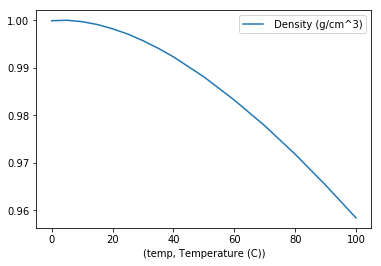

In [4]:
# Cria o objeto onde a figura será gerada
fig = plt.figure()

# Gera o gráfico
agua4.plot(x=0, y=1)

# Altera legenda
plt.legend([agua1[1][1]])

# Exibe a figura
plt.show()

A legenda é incluida automaticamente pelo `plot` do pandas, no momento do comando `agua4.plot(x=0, y=1)`. Verifique isso comentando a linha `plt.legend([agua1[1][1]])` que altera a legenda. Observe, nesse momento, que como a tabela está indexada pelas duas primeiras linhas, a legenda que aparece não é muito apropriada. Por isso alteramos a legenda acima. Abaixo, vemos exemplos onde isso não é necessário.

Mas antes da passarmos para os dados de tuberculose, vamos visualizar, em um mesmo gráfico, as propriedades de densidade e viscosidade da água. Como são atributos de dimensões físicas diferentes ("massa / volume" e "área / tempo", respectivamente), vamos colocar as unidades em lados diferentes da figura. Vejamos como isso pode ser feito. (Veja também [Plots with different scales](https://matplotlib.org/gallery/api/two_scales.html).)

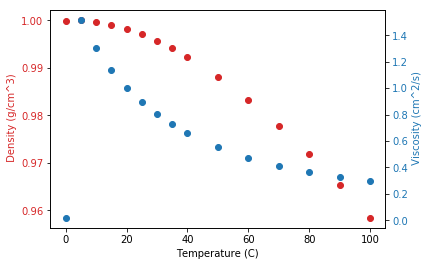

In [9]:
# Cria o objeto onde a figura será gerada
fig, ax1 = plt.subplots()

# Gera o primeira gráfico
color = 'tab:red' # define cor para distinguir os dois gráficos
ax1.set_xlabel(agua1[1][0]) # Define a legenda do eixo horizontal
ax1.set_ylabel( agua1[1][1], color=color) # Define a legenda e a cor do eixo à direita
ax1.plot(agua3[:,0], agua3[:,1], 'o', color=color) # Traça o primeiro gráfico, com a cor desejada
ax1.tick_params(axis='y', labelcolor=color) # "ticks" do eixo com a mesma cor do gráfico

# `twinx` inicia um segundo par de eixos com o eixo x comum ao anterior
ax2 = ax1.twinx()  

# Gera o segundo gráfico
color = 'tab:blue'
# Label do eixo x é comum ao gráfico de cima
ax2.set_ylabel(agua1[1][2], color=color)  # Define a legenda e a cor do eixo à direita
ax2.plot(agua3[:,0], agua3[:,2], 'o', color=color) # Traça o segundo gráfico, com a cor desejada
ax2.tick_params(axis='y', labelcolor=color) # "ticks" do eixo com a mesma cor do gráfico

# Caso o label do eixo direito seja cortado, descomente a linha a seguir
# fig.tight_layout()

# Exibe a figura
plt.show()

### Dados mundiais de tuberculose

Primeiro, importamos dados de tuberculose, entre 2000 e 2015, de diversos países, disponível na página http://www.who.int/tb/country/data/download/en/. Esses dados foram copiados localmente, caso o acesso à internet não esteja disponível, mas primeiramente tentamos acessa na rede. Usamos `try/except` para considerar os dois casos.

In [ ]:
import pandas

try:
    # lê o arquivo .cvs de uma página web
    df = pandas.read_csv('https://extranet.who.int/tme/generateCSV.asp?ds=estimates', sep=',')
    print('Arquivo lido da internet')
except:
    try:
        # se o arquivo não estiver disponível online, usa o arquivo local
        arquivo = path.join(nbpath, 'dados', 'destino_jupyter','TB_burden_countries_2017-03-13.csv')
        df = pandas.read_csv(arquivo, sep=',')
        print('Arquivo lido localmente')
    except:
        print('Arquivo não disponível')

As primeiras dez linhas da tabela podem ser visualizada a seguir, com o método `head()`.

In [ ]:
df.head(10)

Enquanto que as últimas cindo linhas são

In [ ]:
df.tail(5)

O número de linhas e de colunas é 

In [ ]:
df.shape

o signifcado de cada coluna pode ser obtido em outro arquivo .csv, importado a seguir

In [ ]:
# carrega o dicionário
try:
    df_dictionary = pandas.read_csv('https://extranet.who.int/tme/generateCSV.asp?ds=dictionary',',')
    print('Arquivo lido da internet')
except: 
    # se o arquivo não estiver disponível online, usa o arquivo local
    try:
        arquivo = path.join(nbpath,'dados', 'destino_jupyter', 'TB_data_dictionary_2017-03-13.csv')
        df_dictionary = pandas.read_csv(arquivo, sep=',')
        print('Arquivo lido localmente')
    except:
        print('Arquivo não encontrado')
    

Abaixo o conteúdo da primeira linha do dicionário:

In [ ]:
df_dictionary.iloc[0]

Agora uma tabela com as primeiras cinco linhas do dicionário.

In [ ]:
df_dictionary.head(1)

Podemos listar apenas a coluna de definições, através do nome da coluna descrito na linha inicial:

In [ ]:
df_dictionary['definition']

Para vermos todo o conteúdo de uma certa definição:

In [ ]:
df_dictionary.iat[6,3]

Ou

In [ ]:
df_dictionary["definition"][6]

In [ ]:
df_dictionary[df_dictionary["variable_name"] == 'e_pop_num']["definition"]

In [ ]:
df_dictionary[df_dictionary["variable_name"] == 'e_inc_100k']["definition"]

Vamos ver agora só um pedaço da base de dados, de determinados países. 

Selecionamos as colunas 0, 5, 6 e 7, que se referem ao "país", ao "ano", à "população" e a uma variável denotada `e_inc_100k`, que, pelo nome, deve indicar o número de incidências por 100 mil habitantes. 

Podemos verificar isso selecionando a linha que contem 'e_pop_num' ou 'e_inc_100k' como `variable_name`. O resultado obtida é um objeto `pandas` do tipo `Series`. Nesse caso, para ter uma leitura limpa do seu conteúdo, obtemos uma lista com os seus valores. Como só há um valor na lista e é o único que nos interessa, selecionamos o valor na posição 0. Vejamos.

In [ ]:
print("tipo do objeto:", 
      type(df_dictionary[df_dictionary.variable_name == 'e_pop_num']["definition"]))
print("definição de 'e_pop_num':", 
      df_dictionary[df_dictionary.variable_name == 'e_pop_num']["definition"].values[0])
print("definição de 'e_inc_100k':", 
      df_dictionary[df_dictionary.variable_name == 'e_inc_100k']["definition"].values[0])

Agora, selecionamos esses dados para alguns países:

In [ ]:
df_short = df[df.iso2.isin(['AR','BR','CO','PE','US'])].iloc[:,[0,5,6,7]]
print(df_short)

Podemos visualizar os dados do Brasil:

In [ ]:
plt.figure()
df_brazil_e_inc_100k = df[df.iso2=='BR'].iloc[:,[5,7]]
df_brazil_e_inc_100k.plot.bar(x=0, y=1)
plt.show()

E também podemos visualizar os dados comparativos dos países selecionados. Primeiramente, usamos o método `pivot` para alterar o formato da tabela (veja [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)):

In [ ]:
df_short_pivoted = df_short.pivot(index='year', columns='country', values='e_inc_100k')
df_short_pivoted

In [ ]:
plt.figure()
df_short_pivoted.plot()
plt.show()

### Dados do índice Bovespa

Outra série interessante disponível *online* é a do índice bovespa: [BM&F Bovespa: Cotações históricas](http://www.bmfbovespa.com.br/pt_br/servicos/market-data/historico/mercado-a-vista/cotacoes-historicas/). Explore!

## Exercícios

1. Leia o arquivo `dados/destino_jupyter/water_properties_from_Batchelor.csv` e trace o gráfico da viscosidade em função da densidade.

1. Leia o arquivo `dados/destino_jupyter/sensor.cvs` e trace os gráficos, em função do tempo, de cada atributo presenta na tabela.

1. Leia a [tabela de ocorrências aeronáuticas](http://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira/resource/9d8a7e09-5f75-47b3-891b-b5f1bab26d59?inner_span=True) disponível na página do [Portal Brasileiro de Dados Abertos](http://dados.gov.br). Em seguida,
    1. extraia a lista dos tipos de ocorrências; e 
    1. monte um gráfico ilustrando a incidência por tipo de aeronave de um dos tipos de ocorrência a sua escolha.


<!--NAVIGATOR-->

---
[<- 1.3. Gráficos de funções](01.03-Graficos_de_funcoes.ipynb) | [Página Inicial](00.00-Pagina_inicial.ipynb) | [Bibliografia](BA.00-Bibliografia.ipynb) | [1.5. Computação simbólica ->](01.05-Computacao_simbolica.ipynb)

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/notebooks/01.04-Arquivos_dados_e_mais_graficos.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=notebooks/01.04-Arquivos_dados_e_mais_graficos.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;